# Perceptron Learning Algorithm
## Statistical Learning and Prediction Assignment 1 


Create a target function 𝑓	and a bidimensional dataset 𝐷 and see how the perceptron learningalgorithm works. Choose a random line in the plane as your target function, where one side of the line maps to +1 and the other maps to -1. Choose the inputs 𝑥n of the data set as random points in theplane and evaluate the target function on each 𝑥n to get the corresponding output 𝑦n.

a) Create a dataset of size 100. Run the perceptron learning algorithm on your data set and see how longit takes to converge and how well the final hypothesis 𝑔 matches your target 𝑓.

b) Plot the examples {(𝑥n, 𝑦n)} as well as the target function 𝑓 on a plane. Be sure to mark the examplesfrom different classes differently.

c) Report the number of updates that the algorithm takes before converging.

d) Repeat everything in (a) with another randomly generated data set of size 1000. Compare the results with (a).

e) Modify the algorithm such that it takes 𝑥n ∈ ℝ^10. Randomly generate a linearlyseparable data set of size 1000 with 𝑥n ∈ℝ^10 and feed the data set to the algorithm.How many updates does the algorithm take to converge?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_features):
        # Initialize the perceptron with n_features:
        # - weights: A numpy array of zeros, one for each feature.
        # - bias: Initially set to 0.
        self.weights = np.zeros(n_features)
        self.bias = 0

    def fit(self, X, Y, max_iterations=10000):
        # Fit the perceptron model to the training data (X, Y):
        # - X: Training data = 2D array where each row is a data point and each column is a feature
        # - Y: Target values = 1D array of labels
        # - max_iterations: maximum number of iterations to run the learning algorithm
        updates = 0  # Track the number of weight updates
        iterations = 0  # Track the number of iterations
        accuracy_history = []  # List to store accuracy after each iteration
        while iterations < max_iterations:
            error = False  # A flag to check if any update was made in this iteration
            for i in range(len(X)):
                # Check if the current example is misclassified
                if Y[i] * (np.dot(self.weights, X[i]) + self.bias) <= 0:
                    # Update the weights and bias if the example is misclassified
                    self.weights += Y[i] * X[i]
                    self.bias += Y[i]
                    error = True  # Set the flag to True as an update has been made
                    updates += 1  # Increment the update count
            iterations += 1  # Increment the iteration count
            accuracy_history.append(self.accuracy(X, Y)) # Calculate and store accuracy at the end of each iteration
            if not error:
                # If no updates were made in this iteration break the loop (the model has converged)
                break

        return iterations, updates, accuracy_history

    def predict(self, X):
        # Predict the class labels for given data points in X.
        # - X: Data points to predict, a 2D array.
        # The sign of the linear combination of weights and input features plus the bias determines the class.
        return np.sign(np.dot(X, self.weights) + self.bias)

    def accuracy(self, X, Y):
        predictions = self.predict(X)
        return np.mean(predictions == Y)

def generate_linearly_separable_data(n_samples=1000, n_features=10):
    """
    Generates a linearly separable dataset
    - n_samples: The number of samples to generate
    - n_features: The number of features each sample will have (dimension)
    Returns:
    - X: Generated feature data, a 2D numpy array
    - Y: Target labels, a 1D numpy array
    """
    X = np.random.randn(n_samples, n_features)  # Generate random feature data
    true_weights = np.random.randn(n_features)  # Generate random weights
    true_bias = np.random.randn()  # Generate a random bias
    Y = np.sign(np.dot(X, true_weights) + true_bias)  # Determine labels based on the sign of the linear combination
    return X, Y, true_weights, true_bias  # Return the generated data and labels, and true weights and true bias used to plot the target line


def plot_data_and_decision_boundary(X, Y, model, true_weights, true_bias):
    """
    Plots the data points, the initial target line, and the decision boundary of a perceptron model.

    Parameters:
    X (numpy.ndarray): The feature matrix.
    Y (numpy.ndarray): The target labels.
    model (Perceptron): The trained perceptron model.
    true_weights (numpy.ndarray): The true weights used to generate the dataset.
    true_bias (float): The true bias used to generate the dataset.
    """
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, label='Data points')

    # Calculate and plot the initial target line
    slope_true = -true_weights[0] / true_weights[1]
    intercept_true = -true_bias / true_weights[1]
    x_vals_true = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals_true = slope_true * x_vals_true + intercept_true
    plt.plot(x_vals_true, y_vals_true, 'r--', label='Initial Target Line')

    # Calculate and plot the decision boundary
    slope_model = -model.weights[0] / model.weights[1]
    intercept_model = -model.bias / model.weights[1]
    x_vals_model = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals_model = slope_model * x_vals_model + intercept_model
    plt.plot(x_vals_model, y_vals_model, 'k-', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Learning Algorithm')
    plt.legend()
    plt.show()

def plot_accuracy_over_iterations(iterations, accuracies):
    """
    Plots the accuracy of the perceptron model over iterations.
    - iterations (list): A list of iteration numbers.
    - accuracies (list): A list of accuracies corresponding to the iterations.
    """
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Perceptron Accuracy Over Iterations')
    plt.show()

Number of iterations to converge: 94
Number of weight updates to converge: 421


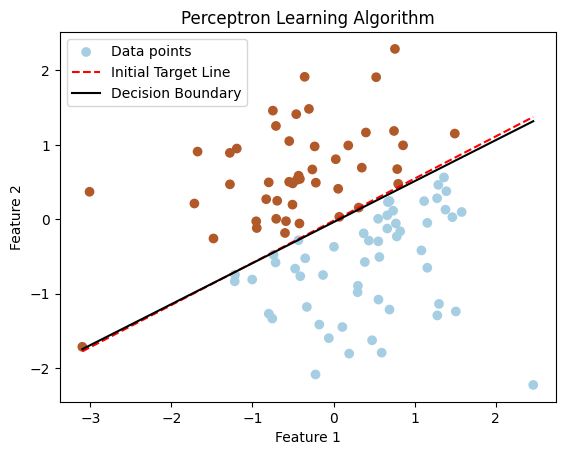

In [2]:
# Usage example with a 2 dimensional dataset of size 100
# Generate a dataset
X, Y, true_weights, true_bias = generate_linearly_separable_data(n_samples=100, n_features=2)

# Train the perceptron
perceptron = Perceptron(n_features=2)
iterations, updates, accuracies = perceptron.fit(X, Y)

# Output the number of iterations to converge
print(f"Number of iterations to converge: {iterations}")
print(f"Number of weight updates to converge: {updates}")

# Plot the data and decision boundary
plot_data_and_decision_boundary(X, Y, perceptron, true_weights, true_bias)


Number of iterations to converge: 15
Number of weight updates to converge: 195


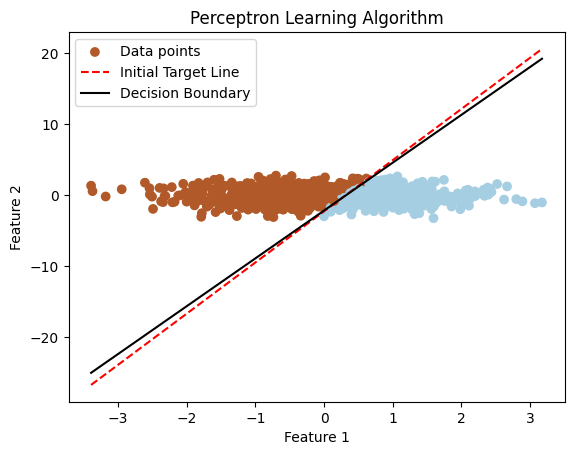

In [3]:
# Repeating the steps with a new dataset of size 1000
# Generate a dataset
X, Y, true_weights, true_bias = generate_linearly_separable_data(n_samples=1000, n_features=2)

# Train the perceptron
perceptron = Perceptron(n_features=2)
iterations, updates, accuracies = perceptron.fit(X, Y)

# Output the number of iterations and updates to converge
print(f"Number of iterations to converge: {iterations}")
print(f"Number of weight updates to converge: {updates}")

# Plot the data and decision boundary
plot_data_and_decision_boundary(X, Y, perceptron, true_weights, true_bias)

Number of iterations to converge: 468
Number of weight updates to converge: 8209


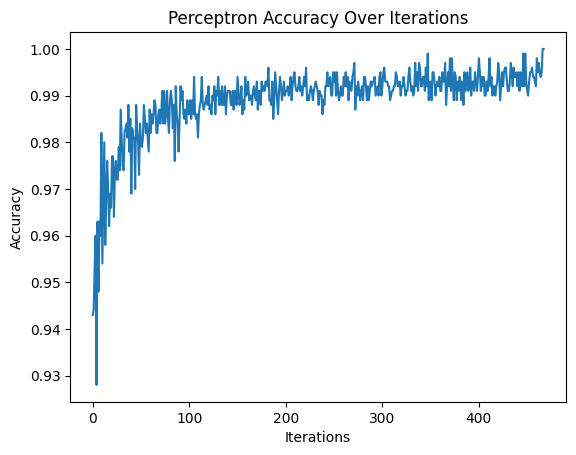

In [4]:
# Generate a 10-dimensional dataset of size 1000
X_10d, Y_10d, true_weights, true_bias = generate_linearly_separable_data(n_samples=1000, n_features=10)

# Train the perceptron
perceptron = Perceptron(n_features=10)
iterations, updates, accuracies = perceptron.fit(X_10d, Y_10d)

# Output the number of iterations and updates to converge
print(f"Number of iterations to converge: {iterations}")
print(f"Number of weight updates to converge: {updates}")

# Plot accuracy over iterations
plot_accuracy_over_iterations(range(iterations), accuracies)
